

# Project: The Movie DataBase (TMDB)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

● Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.

● There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.

● The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

In [1]:
# import statements for all of the packages that y plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling
In this section we are going to load the data and investigate about it.


### General Properties

In [2]:
# Loading  data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_tmdb = pd.read_csv('tmdb_movies.csv')

In [3]:
df_tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04/01/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [4]:
df_tmdb.shape

(10866, 21)

We have 10866 Movie in our data

In [5]:
df_tmdb.duplicated().sum()

1

We have a single duplicated Raw

In [6]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

As we see there is some missing data , but there is data doesn't effect on my answer about question 

In [7]:
df_tmdb.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

there is some missing values , including some data can be droped like 'cast' , 'homepage'

In [8]:
df_tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


There is some values that shouldn't equal 0 , like 'budget' , 'revenue' , 'runtime', 'budget_adj' , 'revenue_adj' , these values needs to Drop or fill it with approximate value 

### Data Cleaning : Removing the unwanted Indices and dealing with missing values

In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [10]:
df_tmdb.drop(['id','imdb_id','cast','homepage','tagline','keywords','release_date','revenue','budget','overview'],axis=1,inplace=True)

In [11]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   original_title        10866 non-null  object 
 2   director              10822 non-null  object 
 3   runtime               10866 non-null  int64  
 4   genres                10843 non-null  object 
 5   production_companies  9836 non-null   object 
 6   vote_count            10866 non-null  int64  
 7   vote_average          10866 non-null  float64
 8   release_year          10866 non-null  int64  
 9   budget_adj            10866 non-null  float64
 10  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 933.9+ KB


Now we have three issues 'Director','genres' and 'production_companies' , we can replace those missing data with "unavailable_data" or "unavailable"

In [12]:
df_tmdb['director'].fillna('unavailable',inplace=True)
df_tmdb['production_companies'].fillna('unavailable',inplace=True)
df_tmdb['genres'].fillna('unknown',inplace=True)

In [13]:
df_tmdb.isnull().sum()

popularity              0
original_title          0
director                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

#### Now it is clean enough to answer my questions

<a id='eda'></a>
## Exploratory Data Analysis



In [14]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

## Research Question 1 :  Which Movie Has The Highest Or Lowest Associated Profit?

In [20]:
# the highest associated profite is the diffrence between both associated revenue and budget
df_tmdb['profit_adj']= df_tmdb['revenue_adj'] - df_tmdb['budget_adj']

In [21]:
maxpro = df_tmdb['profit_adj'].max()
minpro = df_tmdb['profit_adj'].min()
(maxpro ,minpro)

(2750136650.64, -413912431.0)

these are the maximum associated profit and associated minimum profit

In [22]:
# Now we need to apply the entire data of these two values 
df_maxpro = df_tmdb[df_tmdb['profit_adj'] == maxpro]
df_maxpro

,popularity,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
1329,12.037933,Star Wars,George Lucas,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,4428,7.9,1977,39575591.36,2.789712e+09,2.750137e+09


In [23]:
df_minpro = df_tmdb[df_tmdb['profit_adj'] == minpro]
df_minpro 

,popularity,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
2244,0.25054,The Warrior's Way,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,74,6.4,2010,425000000.0,11087569.0,-413912431.0


In [24]:
# joining these two dataframe 
frame = [df_maxpro,df_minpro]
df_profit_asso = pd.concat(frame , axis=0)
df_profit_asso

,popularity,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
1329,12.037933,Star Wars,George Lucas,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,4428,7.9,1977,3.957559e+07,2.789712e+09,2.750137e+09
2244,0.250540,The Warrior's Way,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,74,6.4,2010,4.250000e+08,1.108757e+07,-4.139124e+08


### Those are the best and the worst associated profit movie in terms of 2010 dollars

## Research Question 2 : Is there is any correlation between popularity and associated profit ?

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
#    

<AxesSubplot:xlabel='profit_adj', ylabel='popularity'>

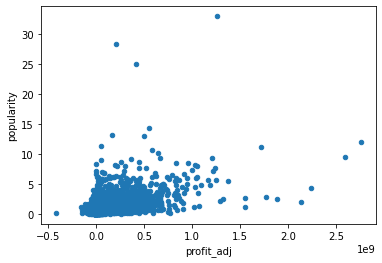

In [25]:
df_tmdb.plot(x='profit_adj',y='popularity',kind='scatter')

#### there is an approximation positive correlation between popularity and associated profit as mostly concentrated in a specific area

## Research Question 3 : the most produced genres/categories 

In [26]:
# we need to take the data in the column and separate it from '|' and store the genres in a list 
def dat(column):
    # take every single data to separate them by '|'
    dat = df_tmdb[column].str.cat(sep='|')
    # we going to store every value separtely
    dat = pd.Series(dat.split('|'))
    number = dat.value_counts()
    return number

In [27]:
number = dat('genres')
number

Drama              4761
Comedy             3793
Thriller           2908
Action             2385
Romance            1712
Horror             1637
Adventure          1471
Crime              1355
Family             1231
Science Fiction    1230
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
unknown              23
dtype: int64

we have the top 5 of gernes : Drama , Comedy , thriller , Action and Romance

let's now but our data in a graphical analysys

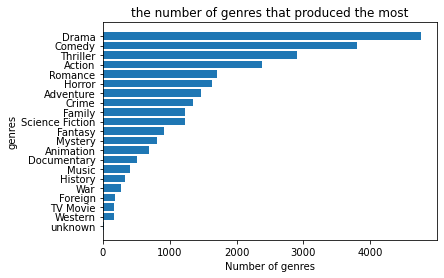

In [28]:
# First we need to arrange our data 
number.sort_values(ascending = True , inplace = True)
plt.barh(number.index,number);
plt.title('the number of genres that produced the most');
plt.xlabel('Number of genres');
plt.ylabel('genres');

#### It seems that Drama , comedy ,thriler and Action are the most produced genre

<a id='conclusions'></a>
## Conclusions




##### There is the most interesting questions that may any investor ask 


1-The correlation between popularity and associated profite in terms of 2010 dollars 

2-the data of lowest asso. profit and the highest so it can help in making decessions

3-the mostly produced genres that can take decision in which genre should be investigate 

#### Limitations
there is some data not found in genres which can help in taking decissions 